# Принятие решений в бизнесе
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Файл /datasets/hypothesis.csv.**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл /datasets/orders.csv.**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv.**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез

In [1]:
#Импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
# Открываем файлы и выводим на экран
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(hypothesis)
display(orders.head())
display(visitors.head())
# Вызываем функцию info() для оценки заполненности таблицы, соответствия типов данных столбцов хранимым в них значениях
hypothesis.info()
orders.info()
visitors.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

In [4]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [5]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Наиболее перспективные гипотезы по ICE - 8, 0, 7, 6. Наиболее перспективные гипотезы по RICE - 7, 2, 0, 6. Гипотезы 0, 7, 6 имеются и там, и там. Однако, в случае с RICE  на первом месте гипотеза 7, тк у ее параметр Rich равен 10, у других гипотез он меньше, а гипотеза 8 не вошла в список перспективных, тк ее параметр Rich равен 1.

# Часть 2. Анализ A/B-теста

In [6]:
# К каждому значению столбца date применим lambda-функцию
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [7]:
# Проверим на наличие пользователей одновременно в 2х группах
duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(duplicated_users.head())
display(duplicated_users.info())

,groups,group_names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 8300375 to 4266935830
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   groups       58 non-null     int64 
 1   group_names  58 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


None

Вывод: 58 пользователей оказались одновременно в 2х группах. Не будем их удалять, тк на результаты исследования они не сильно повлияют.

In [8]:
# Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group' таблицы orders. 
# Избавимся от дубликатов методом drop_duplicates().
datesGroups = orders[['date', 'group']].drop_duplicates()

In [9]:
# Объявим переменную ordersAggregated, содержащую: дату; группу A/B-теста; число уникальных заказов в группе теста по указанную дату включительно;
# число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
# суммарную выручку заказов в группе теста по указанную дату включительно
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [10]:
#  Объявим переменную visitorsAggregated, содержащую: дату; группу A/B-теста; количество уникальных посетителей в группе теста по указанную дату включительно.
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [11]:
# Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()
# Присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [12]:
# Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

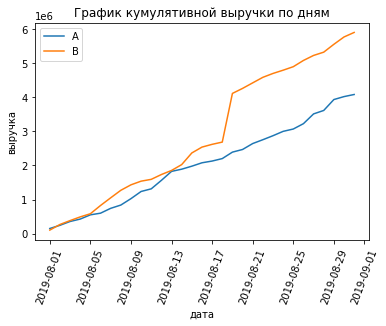

In [13]:
# Построим графики кумулятивной выручки по дням по группам.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation='70')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('График кумулятивной выручки по дням')
plt.legend()

Вывод: почти сразу после начала теста сегмент В лидировал, с середины теста - значительно вырвался вперед. Похоже, аномально большие заказы влияют на результаты.

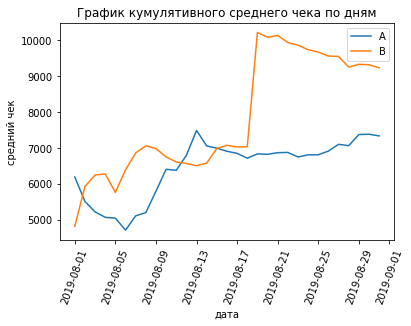

In [14]:
# Для каждой группы построим графики кумулятивного среднего чека по дням.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation='70')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('График кумулятивного среднего чека по дням')
plt.legend() 

Вывод: C середины теста кумулятивное значение среднего чека сегмента В значительно выше. 

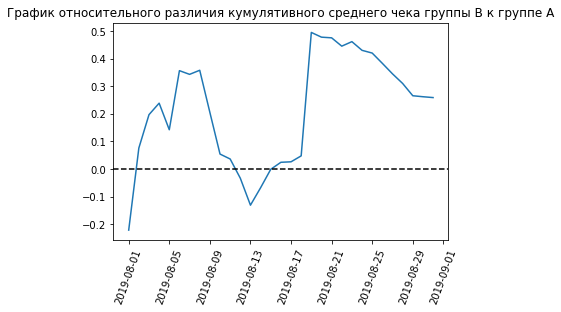

In [15]:
# Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. 
# Построим график относительного различия кумулятивного среднего чека группы B к группе A.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='70')
plt.title('График относительного различия кумулятивного среднего чека группы B к группе A')
plt.show()

Вывод: Результаты теста значительно и резко менялись в несколько дат. Видимо, тогда были совершены аномальные заказы.

(18109.0, 18140.0, 0.0, 0.05)

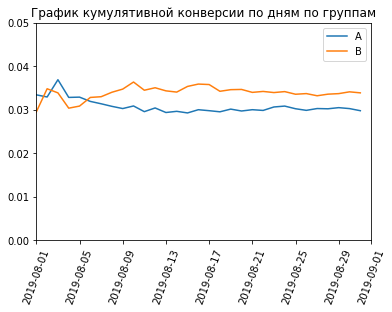

In [16]:
# Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
# Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраним данные о заказах в сегментах A и B соответственно.
# Построим графики кумулятивной конверсии по дням по группам.
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation='70')
plt.title('График кумулятивной конверсии по дням по группам')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

Вывод: в начале теста сегмент А имел большую конверсию, но затем сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А.

(18109.0, 18140.0, -0.5, 0.5)

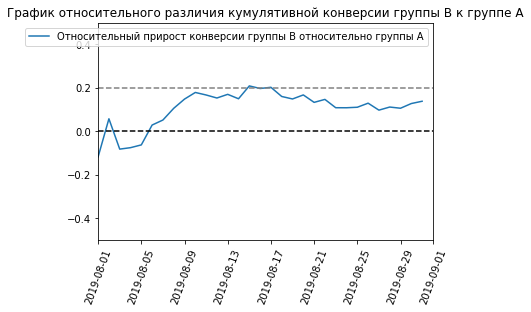

In [17]:
# Объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB'].
# Построим график относительного различия кумулятивной конверсии группы B к группе A.
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation='70')
plt.title('График относительного различия кумулятивной конверсии группы B к группе A')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])

Вывод: почти с самого начала теста группа В лидирует по конверсии: становится лучше и лучше, либо фиксировалась около прироста в 20% относительно группы А.

In [18]:
# создадим датафрейм c двумя столбцами: 'userId' и 'orders'
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

Text(0.5, 1.0, 'График количества заказов по пользователям')

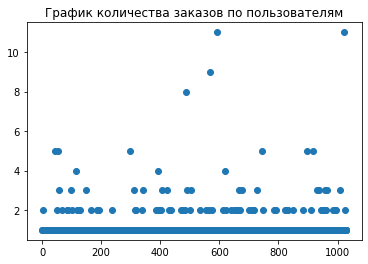

In [19]:
# Построим точечный график количества заказов по пользователям.
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')

Вывод: пользователей, заказавших более 2х раз, мало. Они могут быть аномальными.

In [20]:
# Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([2., 4.])

Вывод: не более 5% пользователей совершали более 2х заказов. И не более 1% пользователей - больше 4 заказов. Нижняя граница для определения аномальных пользователей - те, которые совершили более 2х заказов.

Text(0.5, 1.0, 'График стоимостей заказов')

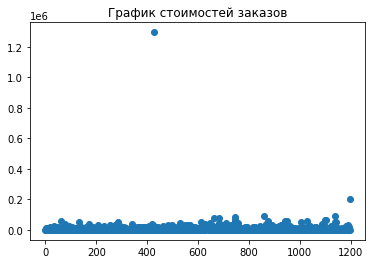

In [21]:
# Построим точечный график стоимостей заказов. 
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')

(0.0, 1200.0, 0.0, 200000.0)

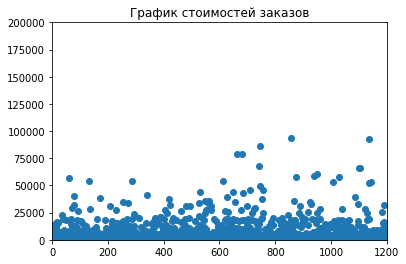

In [22]:
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')
plt.axis([0, 1200, 0, 0.2e6])

Вывод: заказов стоимостью более 150 000 руб мало. Имеются выбросы в районе 200 000руб и 1 300 000руб (они выглядят как аномальные заказы).

In [23]:
# Посчитаем 95-й и 99-й перцентили стоимости заказов
display(np.percentile(orders['revenue'], [95, 99])) 

array([28000. , 58233.2])

Вывод: не более 5% заказов дороже 28 000 руб, не более 1% заказов дороже 58 233руб. Нижняя граница для определения аномальных заказов- 30 000 руб.

**Сформулируем гипотезы.** Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [24]:
# Подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [25]:
# создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], 
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [26]:
# Объявим переменные sampleA и sampleB, 
# в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули. 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [27]:
# Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
# Выведем p-value для сравнения конверсии между группами
display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# Вычислим и выведем относительное различие в конверсии между группами. 
display("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

'0.01679'

'0.138'

Вывод:  p-value меньше 0,05, потому нулевую гипотезу отвергаем. По анализу "сырых данных" видно, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

**Сформулируем гипотезы.** Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [28]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'0.729'

'0.259'

Вывод: p-value больше 0,05, следовательно, статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами 25,9%.

In [29]:
# Подготовим очищенные от аномалий данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

(68,)

Вывод: всего 68 аномальных пользователей.

In [30]:
# Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

display('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

'0.01334'

'0.172'

Вывод: p-value меньше 0,05, потому нулевую гипотезу отвергаем. В конверсии между группами есть статистически значимые различия, что подтверждает выводы с "сырыми данными". Относительный прирост конверсии группы В к конверсии группы А равен 17,2%. 

In [31]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
display('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

display("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

'0.720'

'-0.023'

Вывод: P-value примерно на том же уровне, но разница между сегментами сократилась с 25% до 2%.

**Выводы**:
1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
2. По сырым данным, как и после фильтрации аномалий, нет статистически значимого различия по среднему чеку между группами.
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
4. График различия среднего чека колеблется: он позволил найти аномалии.

Итого, имеем решение - Остановить тест, зафиксировать победу одной из групп (группы В). 